In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline
plt.style.use('ggplot')

In [178]:
plt.rcParams["figure.figsize"] = (18,6)
sns.set_palette("husl")

ESTILO = "background-color:lightgrey; display:inline"
pd.options.mode.chained_assignment = None

TARGET = 'readmitted'

In [3]:
def dropear_columnas(dataset, columnas):
    return dataset.drop(columnas, axis = 1)

In [4]:
df_raw = pd.read_csv("data\diabetic_data.csv")

# Vista del Dataset: Head/Tail

In [5]:
display(df_raw.head())
display(HTML('<br><hr><br>'))
display(df_raw.tail())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [6]:
df_raw = dropear_columnas(df_raw, ['encounter_id', 'patient_nbr'])

# Información sobre el Dataset

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    101766 non-null  object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                101766 non-null  object
 9   medical_specialty         101766 non-null  object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

# Descripción del Dataset

In [8]:
display(df_raw.describe().T)
display(df_raw.describe(include=[object]))

,count,mean,std,min,25%,50%,75%,max
admission_type_id,101766.0,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0


,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


# Comprobación de Nulos

In [9]:
df_raw.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

# EDA Univariable

In [10]:
columnas_cat      = []
columnas_cat_diag = []
columnas_dropear  = []
columnas_num      = []

## Race

In [11]:
display(df_raw['race'].value_counts(normalize=True))

Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64

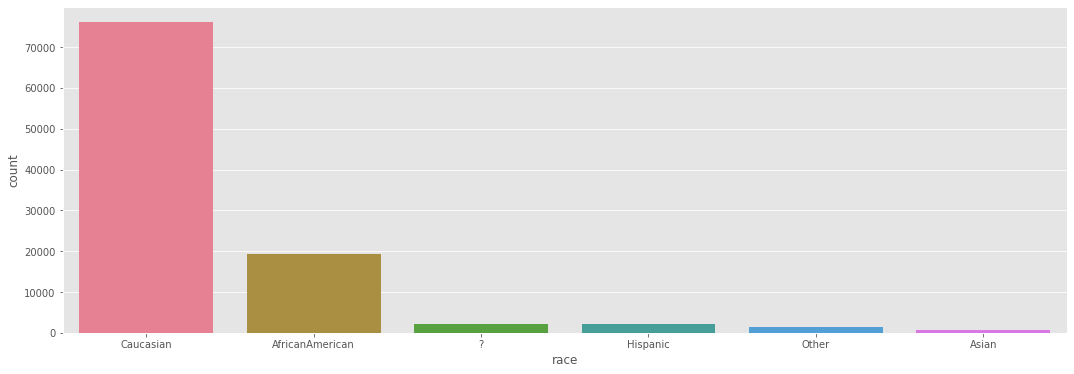

In [12]:
sns.countplot(x=df_raw['race'], 
              order = df_raw['race'].value_counts().index);

In [13]:
columnas_cat.append('race')

## Gender

In [14]:
display(df_raw['gender'].value_counts())

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [15]:
columnas_cat.append('gender')

## Age

In [16]:
display(df_raw['age'].value_counts(normalize=True))

[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: age, dtype: float64

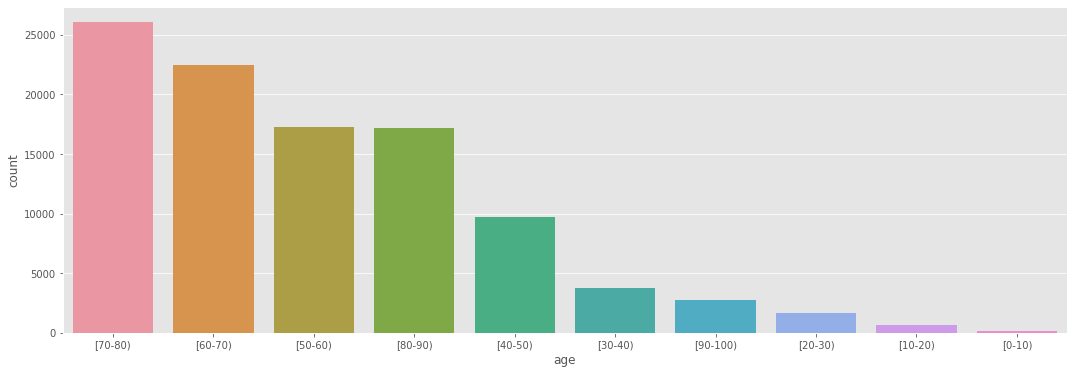

In [17]:
sns.countplot(x=df_raw['age'], 
              order = df_raw['age'].value_counts().index);

In [18]:
columnas_cat.append('age')

## Weight

In [19]:
display(df_raw['weight'].value_counts(normalize=True))

?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: weight, dtype: float64

In [20]:
columnas_dropear.append('weight')

## Admission type id

In [21]:
display(df_raw['admission_type_id'].value_counts(normalize=True))

1    0.530531
3    0.185416
2    0.181593
6    0.051992
5    0.047020
8    0.003144
7    0.000206
4    0.000098
Name: admission_type_id, dtype: float64

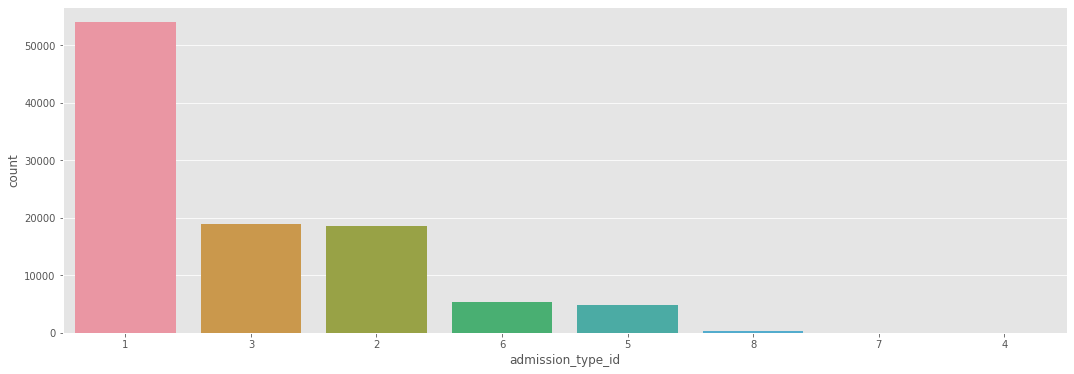

In [22]:
sns.countplot(x=df_raw['admission_type_id'], 
              order = df_raw['admission_type_id'].value_counts().index);

In [23]:
columnas_cat.append('admission_type_id')

## Discharge disposition id

In [24]:
display(df_raw['discharge_disposition_id'].value_counts())

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

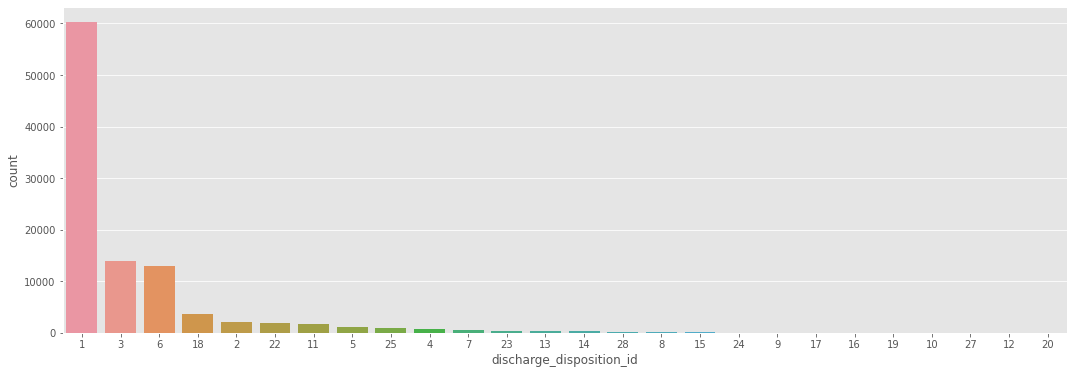

In [25]:
sns.countplot(x=df_raw['discharge_disposition_id'], 
              order = df_raw['discharge_disposition_id'].value_counts().index);

In [26]:
columnas_cat.append('discharge_disposition_id')

## Admission source id

In [27]:
display(df_raw['admission_source_id'].value_counts(normalize=True))

7     0.564963
1     0.290519
17    0.066633
4     0.031317
6     0.022247
2     0.010848
5     0.008402
3     0.001838
20    0.001582
9     0.001228
8     0.000157
22    0.000118
10    0.000079
11    0.000020
14    0.000020
25    0.000020
13    0.000010
Name: admission_source_id, dtype: float64

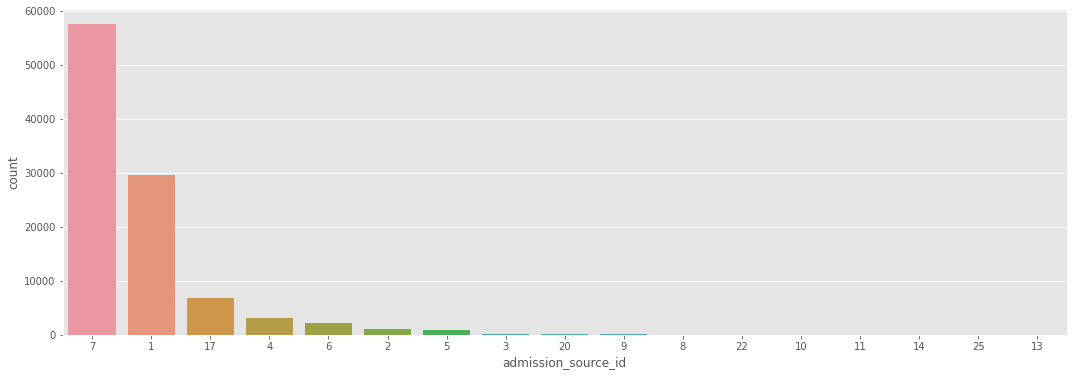

In [28]:
sns.countplot(x=df_raw['admission_source_id'], 
              order = df_raw['admission_source_id'].value_counts().index);

In [29]:
columnas_cat.append('admission_source_id')

## Time in Hospital

In [30]:
display(df_raw['time_in_hospital'].value_counts(normalize=True))

3     0.174479
2     0.169251
1     0.139614
4     0.136824
5     0.097931
6     0.074082
7     0.057573
8     0.043148
9     0.029499
10    0.023014
11    0.018228
12    0.014229
13    0.011890
14    0.010239
Name: time_in_hospital, dtype: float64

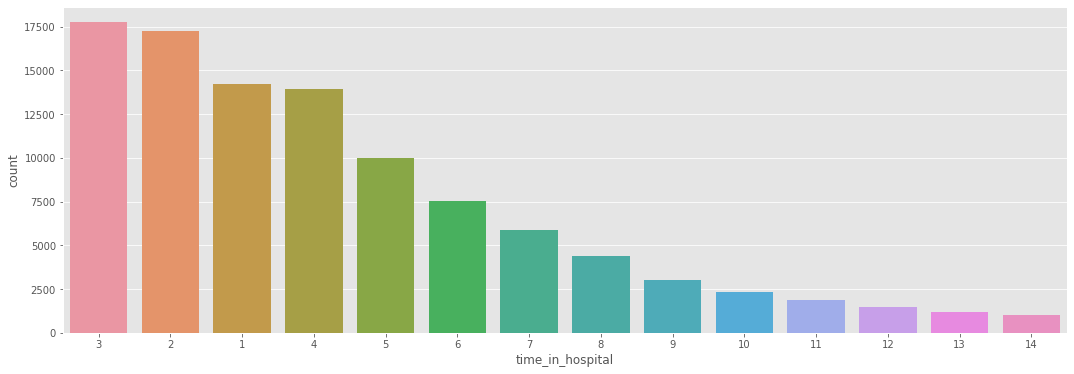

In [31]:
sns.countplot(x=df_raw['time_in_hospital'], 
              order = df_raw['time_in_hospital'].value_counts().index);

In [32]:
columnas_cat.append('time_in_hospital')

## Payer code

In [33]:
display(df_raw['payer_code'].value_counts(normalize=True))

?     0.395574
MC    0.318761
HM    0.061651
SP    0.049201
BC    0.045742
MD    0.034707
CP    0.024890
UN    0.024055
CM    0.019034
OG    0.010151
PO    0.005817
DM    0.005395
CH    0.001435
WC    0.001327
OT    0.000934
MP    0.000776
SI    0.000540
FR    0.000010
Name: payer_code, dtype: float64

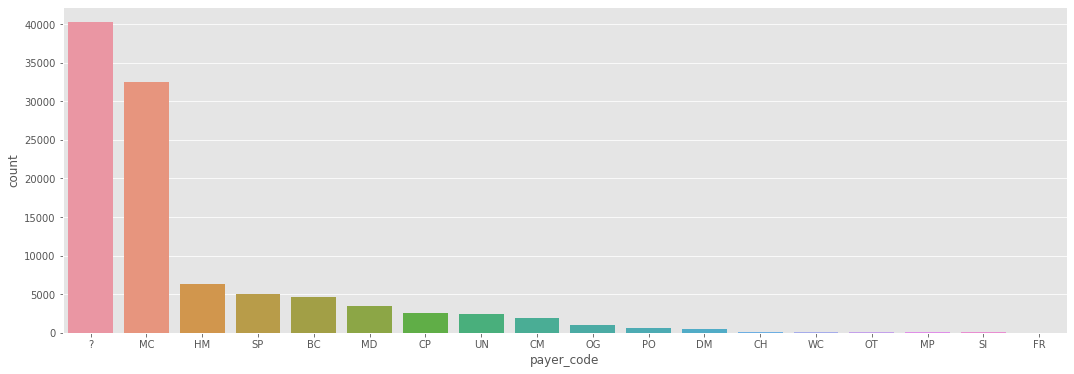

In [34]:
sns.countplot(x=df_raw['payer_code'], 
              order = df_raw['payer_code'].value_counts().index);

In [35]:
columnas_cat.append('payer_code')

## Medical Specialty         

In [36]:
display(df_raw['medical_specialty'].value_counts(normalize=True))

?                                   0.490822
InternalMedicine                    0.143810
Emergency/Trauma                    0.074337
Family/GeneralPractice              0.073109
Cardiology                          0.052591
                                      ...   
Speech                              0.000010
Surgery-PlasticwithinHeadandNeck    0.000010
Neurophysiology                     0.000010
Pediatrics-InfectiousDiseases       0.000010
SportsMedicine                      0.000010
Name: medical_specialty, Length: 73, dtype: float64

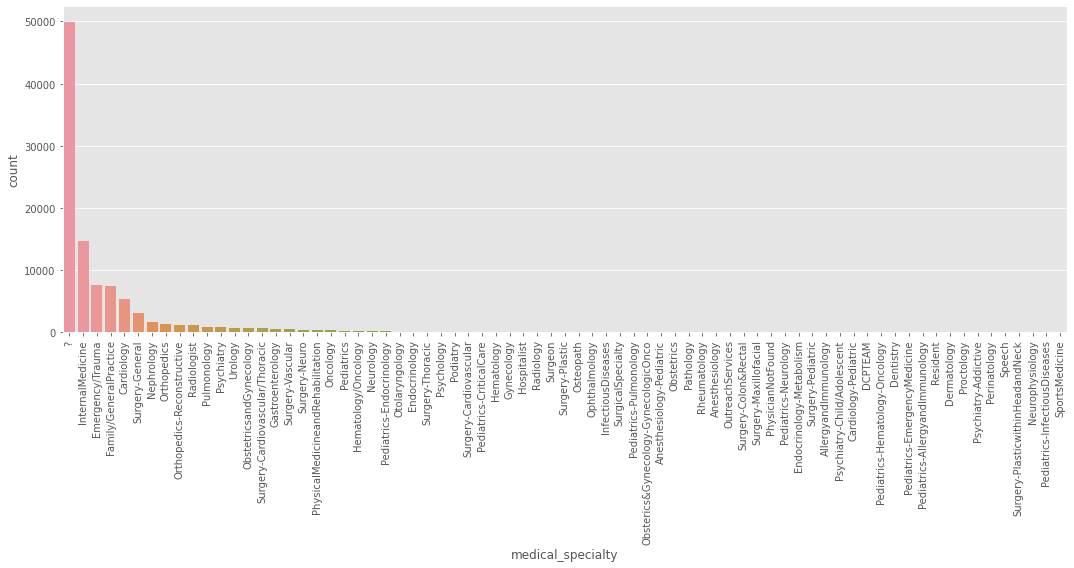

In [37]:
sns.countplot(x=df_raw['medical_specialty'], 
              order = df_raw['medical_specialty'].value_counts().index);
plt.xticks(rotation = 90);

In [38]:
columnas_dropear.append('medical_specialty')

## N° Lab Procedures 

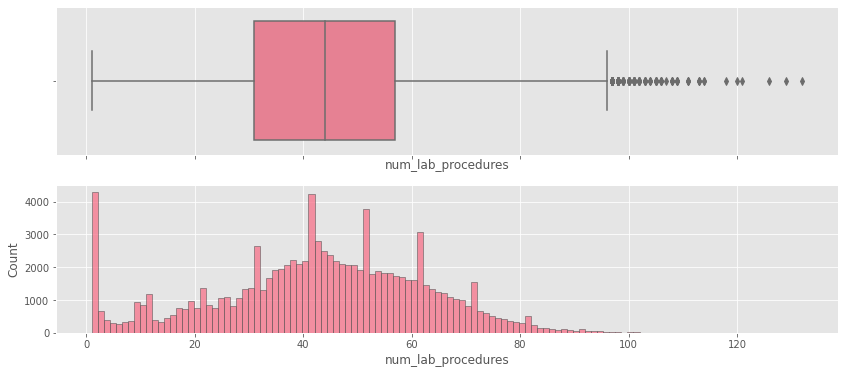

In [39]:
fig, axs = plt.subplots(2, figsize = (14,6), sharex = True)

sns.boxplot(x=df_raw['num_lab_procedures'], ax=axs[0]);
sns.histplot(
    df_raw,
    x="num_lab_procedures",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    ax=axs[1]
);

## N° Procedures

In [40]:
display(df_raw['num_procedures'].value_counts(normalize=True))

0    0.458424
1    0.203821
2    0.124963
3    0.092791
6    0.048680
4    0.041075
5    0.030246
Name: num_procedures, dtype: float64

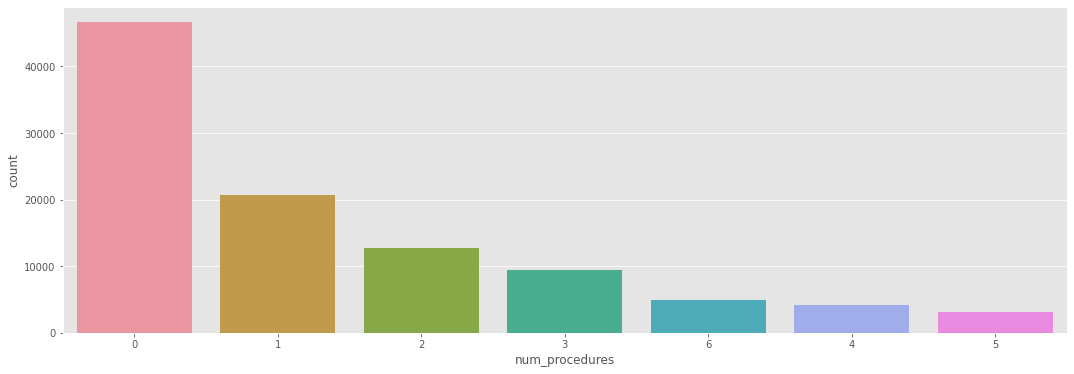

In [41]:
sns.countplot(x=df_raw['num_procedures'], 
              order = df_raw['num_procedures'].value_counts().index);

In [42]:
columnas_cat.append('num_procedures')

## N° Medications 

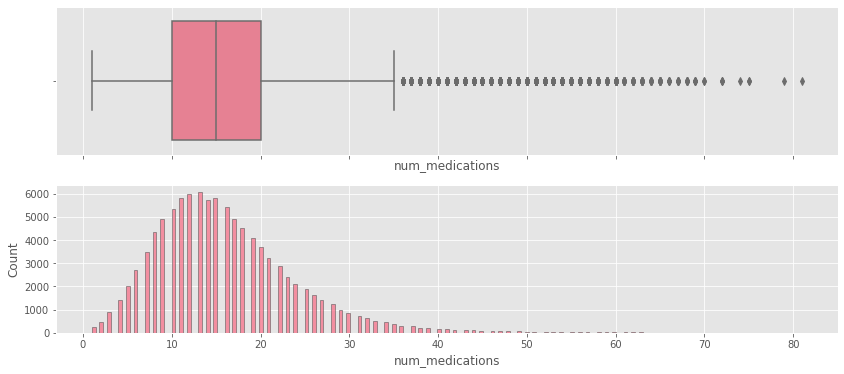

In [43]:
fig, axs = plt.subplots(2, figsize = (14,6), sharex = True)

sns.boxplot(x=df_raw['num_medications'], ax=axs[0]);
sns.histplot(
    df_raw,
    x="num_medications",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    ax=axs[1]
);

In [44]:
columnas_num.append("num_medications")

## N° Outpatient

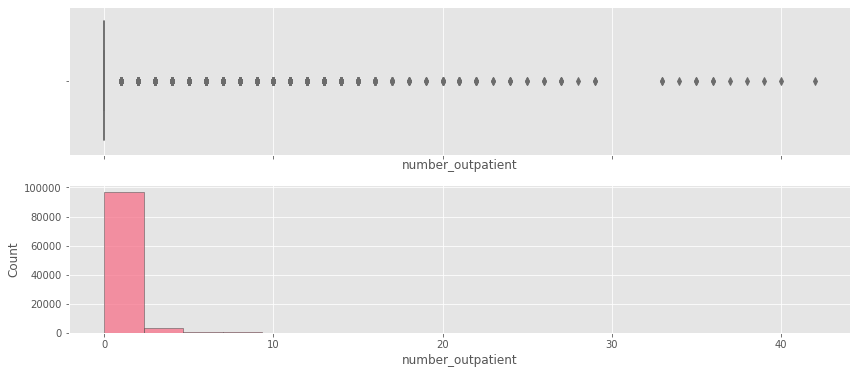

In [45]:
fig, axs = plt.subplots(2, figsize = (14,6), sharex = True)

sns.boxplot(x=df_raw['number_outpatient'], ax=axs[0]);
sns.histplot(
    df_raw,
    x="number_outpatient",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    ax=axs[1]
);

In [46]:
columnas_dropear.append("num_medications")

## N° emergency

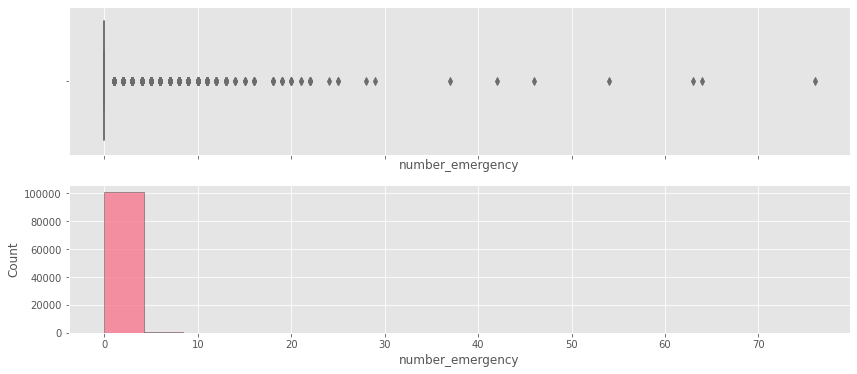

In [47]:
fig, axs = plt.subplots(2, figsize = (14,6), sharex = True)

sns.boxplot(x=df_raw['number_emergency'], ax=axs[0]);
sns.histplot(
    df_raw,
    x="number_emergency",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    ax=axs[1]
);

In [48]:
columnas_dropear.append("number_emergency")

## N° inpatient

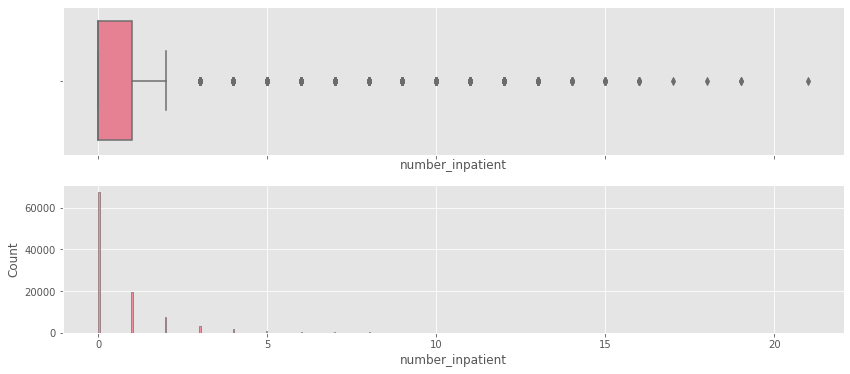

In [49]:
fig, axs = plt.subplots(2, figsize = (14,6), sharex = True)

sns.boxplot(x=df_raw['number_inpatient'], ax=axs[0]);
sns.histplot(
    df_raw,
    x="number_inpatient",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    ax=axs[1]
);

In [50]:
columnas_cat.append('number_inpatient')

## Diagnostic 1

In [51]:
display(df_raw['diag_1'].value_counts(normalize=True))

428    0.067429
414    0.064668
786    0.039463
410    0.035513
486    0.034471
         ...   
133    0.000010
791    0.000010
804    0.000010
V70    0.000010
885    0.000010
Name: diag_1, Length: 717, dtype: float64

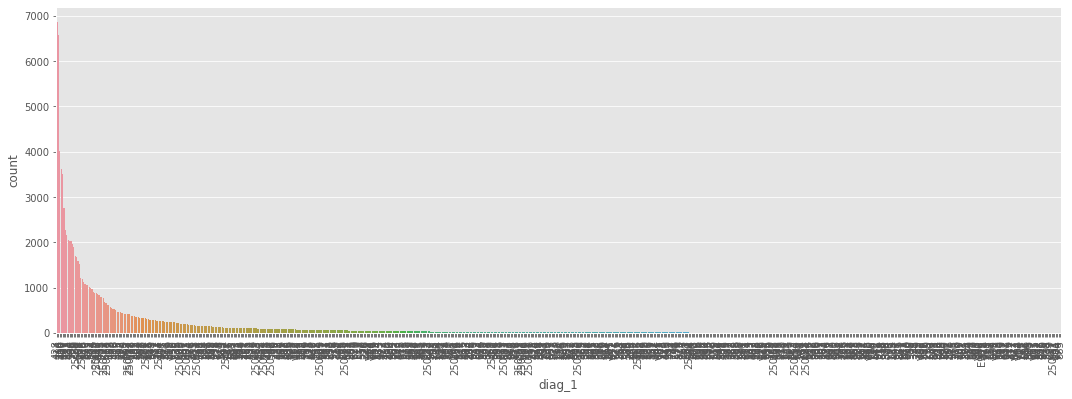

In [52]:
sns.countplot(x=df_raw['diag_1'], 
              order = df_raw['diag_1'].value_counts().index);
plt.xticks(rotation = 90);

In [53]:
columnas_cat_diag.append('diag_1')

## Diagnostic 2

In [54]:
display(df_raw['diag_2'].value_counts(normalize=True))

276     0.066348
428     0.065464
250     0.059656
427     0.049486
401     0.036712
          ...   
963     0.000010
863     0.000010
E817    0.000010
137     0.000010
955     0.000010
Name: diag_2, Length: 749, dtype: float64

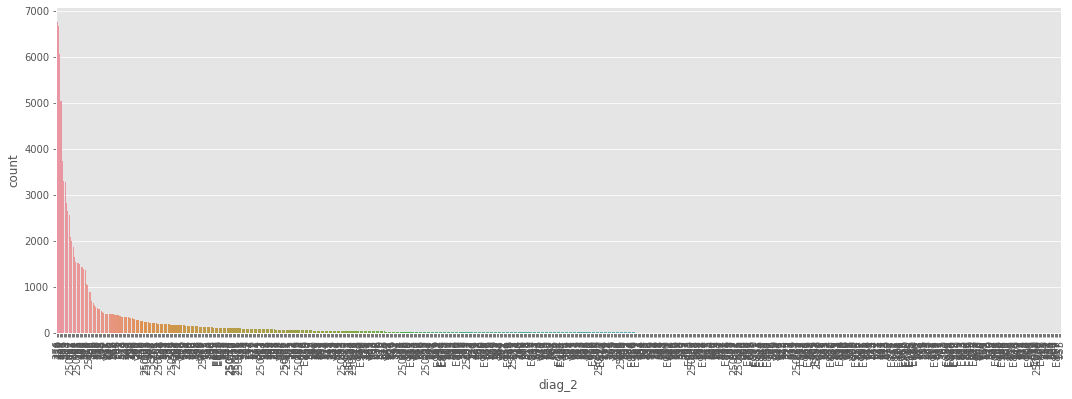

In [55]:
sns.countplot(x=df_raw['diag_2'], 
              order = df_raw['diag_2'].value_counts().index);
plt.xticks(rotation = 90);

In [56]:
columnas_cat_diag.append('diag_2')

## Diagnostic 3

In [57]:
display(df_raw['diag_3'].value_counts(normalize=True))

250    0.113545
401    0.081452
276    0.050852
428    0.044976
427    0.038864
         ...   
308    0.000010
475    0.000010
890    0.000010
385    0.000010
448    0.000010
Name: diag_3, Length: 790, dtype: float64

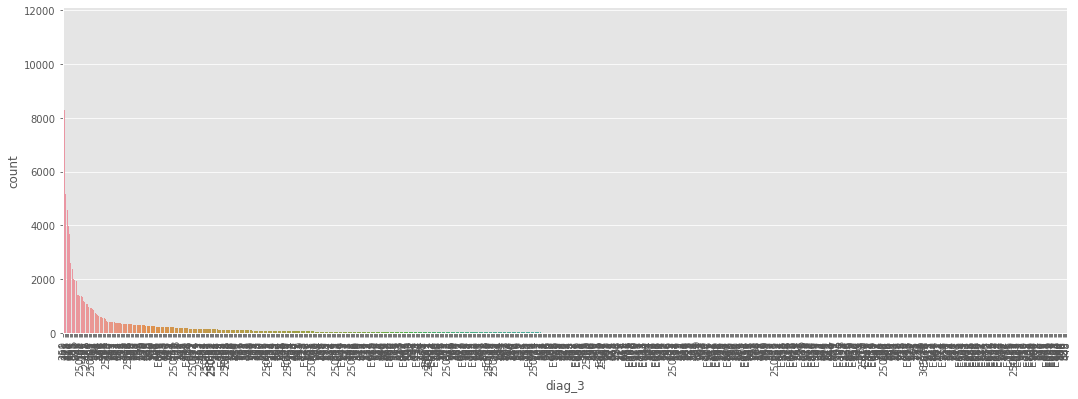

In [58]:
sns.countplot(x=df_raw['diag_3'], 
              order = df_raw['diag_3'].value_counts().index);
plt.xticks(rotation = 90);

In [59]:
columnas_cat_diag.append('diag_3')

## N° diagnoses

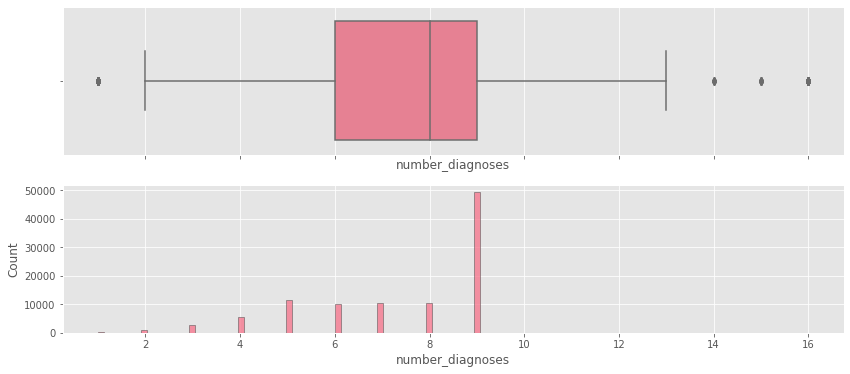

In [60]:
fig, axs = plt.subplots(2, figsize = (14,6), sharex = True)

sns.boxplot(x=df_raw['number_diagnoses'], ax=axs[0]);
sns.histplot(
    df_raw,
    x="number_diagnoses",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    ax=axs[1],
);

In [61]:
columnas_num.append('number_diagnoses')

## max glu serum 

In [62]:
display(df_raw['max_glu_serum'].value_counts(normalize=True))

None    0.947468
Norm    0.025519
>200    0.014592
>300    0.012421
Name: max_glu_serum, dtype: float64

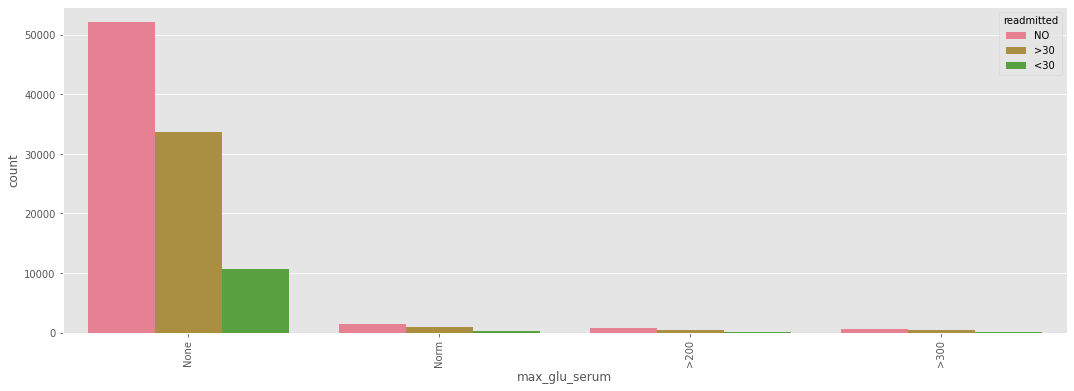

In [63]:
sns.countplot(x = 'max_glu_serum', 
              order = df_raw['max_glu_serum'].value_counts().index,
              data = df_raw,
              hue='readmitted')

plt.xticks(rotation = 90);

In [64]:
columnas_dropear.append('max_glu_serum')

## A1 Cresult

In [65]:
display(df_raw['A1Cresult'].value_counts(normalize=True))

None    0.832773
>8      0.080734
Norm    0.049034
>7      0.037458
Name: A1Cresult, dtype: float64

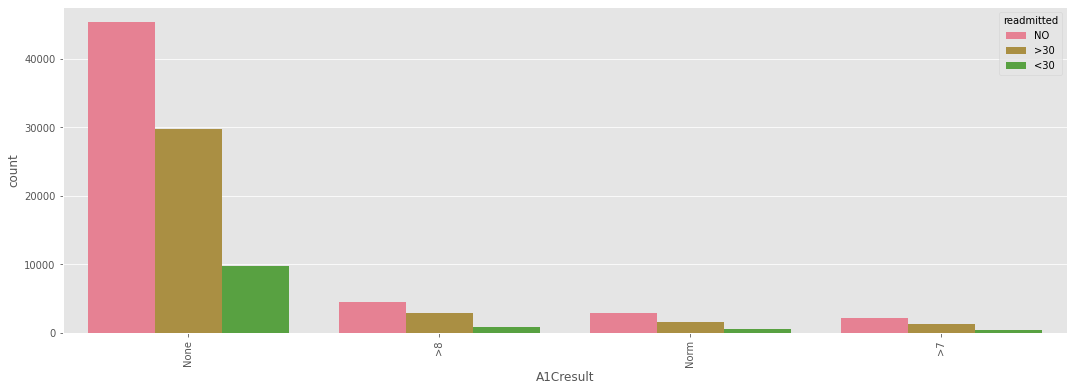

In [66]:
sns.countplot(x = 'A1Cresult', 
              order = df_raw['A1Cresult'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [67]:
columnas_cat.append('A1Cresult')

## Metformin

In [68]:
display(df_raw['metformin'].value_counts(normalize=True))

No        0.803589
Steady    0.180276
Up        0.010485
Down      0.005650
Name: metformin, dtype: float64

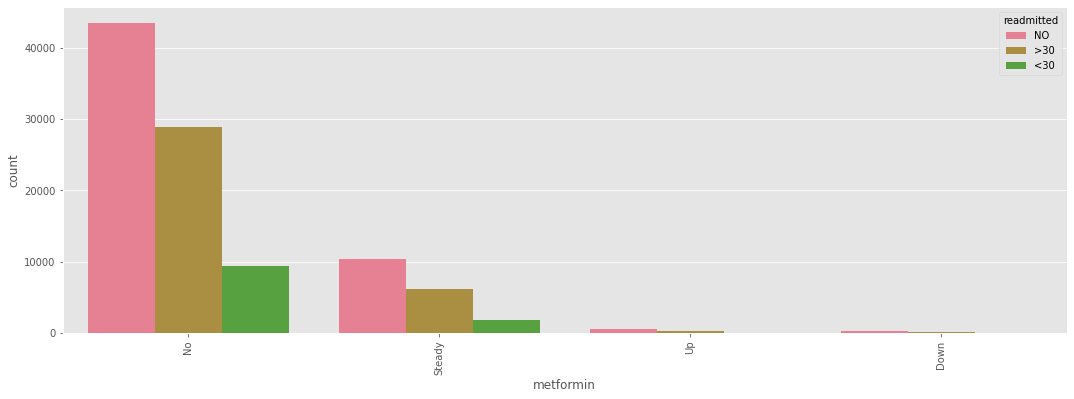

In [69]:
sns.countplot(x = 'metformin', 
              order = df_raw['metformin'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [70]:
columnas_cat.append('metformin')

## Repaglinide

In [71]:
display(df_raw['repaglinide'].value_counts(normalize=True))

No        0.984877
Steady    0.013600
Up        0.001081
Down      0.000442
Name: repaglinide, dtype: float64

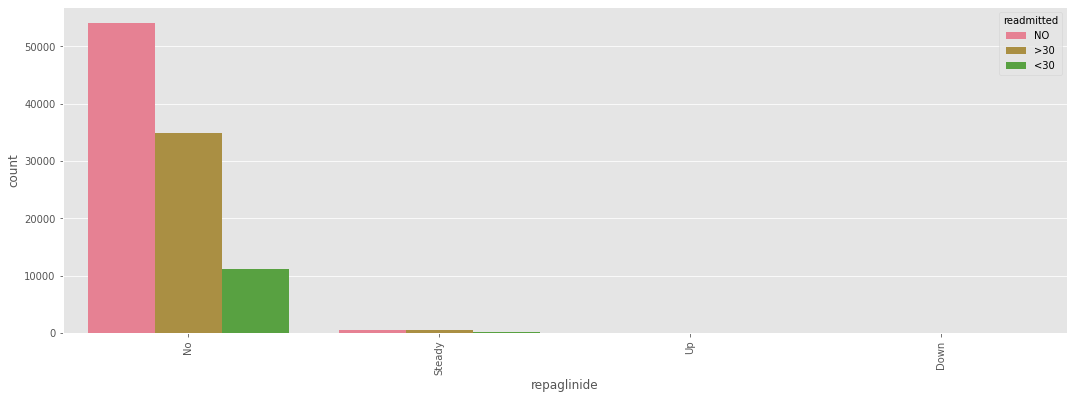

In [72]:
sns.countplot(x = 'repaglinide', 
              order = df_raw['repaglinide'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [73]:
columnas_dropear.append('repaglinide')

## Nateglinide

In [74]:
display(df_raw['nateglinide'].value_counts(normalize=True))

No        0.993092
Steady    0.006564
Up        0.000236
Down      0.000108
Name: nateglinide, dtype: float64

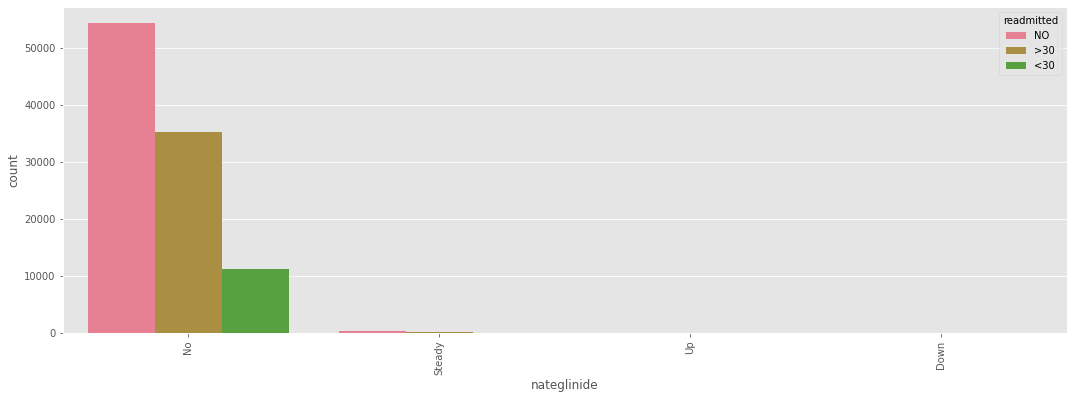

In [75]:
sns.countplot(x = 'nateglinide', 
              order = df_raw['nateglinide'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [76]:
columnas_dropear.append('nateglinide')

## Chlorpropamide

In [77]:
display(df_raw['chlorpropamide'].value_counts(normalize=True))

No        0.999155
Steady    0.000776
Up        0.000059
Down      0.000010
Name: chlorpropamide, dtype: float64

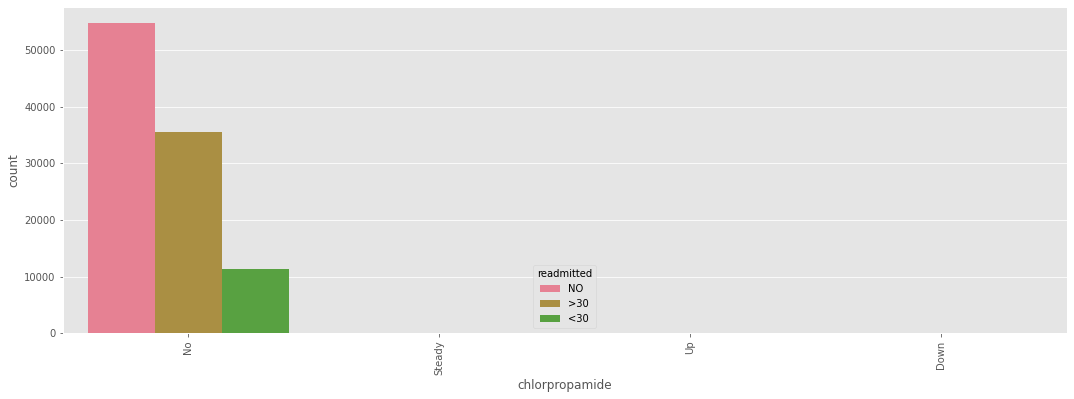

In [78]:
sns.countplot(x = 'chlorpropamide', 
              order = df_raw['chlorpropamide'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [79]:
columnas_dropear.append('chlorpropamide')

## Glimepiride

In [80]:
display(df_raw['glimepiride'].value_counts(normalize=True))

No        0.948991
Steady    0.045890
Up        0.003213
Down      0.001906
Name: glimepiride, dtype: float64

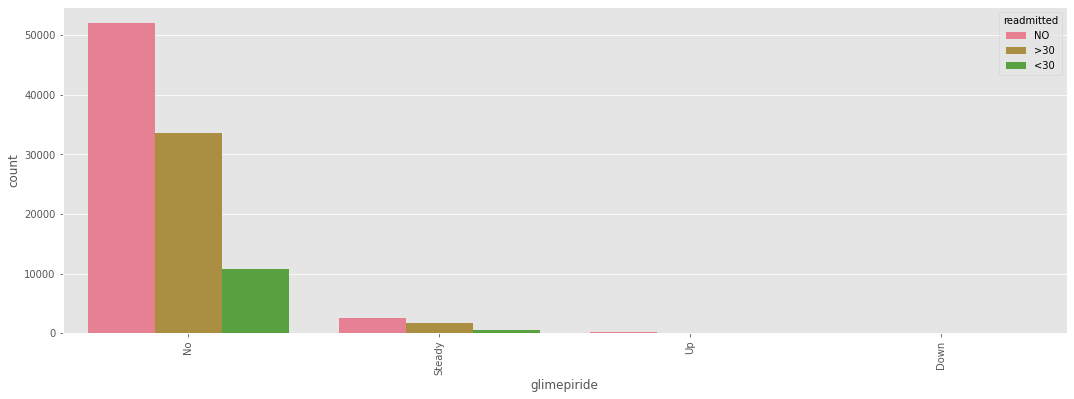

In [81]:
sns.countplot(x = 'glimepiride', 
              order = df_raw['glimepiride'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [82]:
columnas_dropear.append('glimepiride')

## Acetohexamide

In [83]:
display(df_raw['acetohexamide'].value_counts(normalize=True))

No        0.99999
Steady    0.00001
Name: acetohexamide, dtype: float64

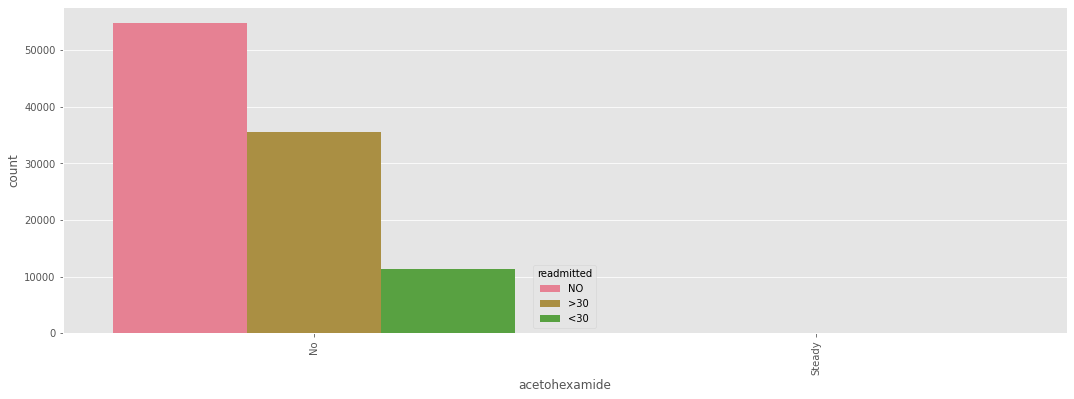

In [84]:
sns.countplot(x = 'acetohexamide', 
              order = df_raw['acetohexamide'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [85]:
columnas_dropear.append('acetohexamide')

## Glyburide

In [86]:
display(df_raw['glyburide'].value_counts(normalize=True))

No        0.895348
Steady    0.091131
Up        0.007979
Down      0.005542
Name: glyburide, dtype: float64

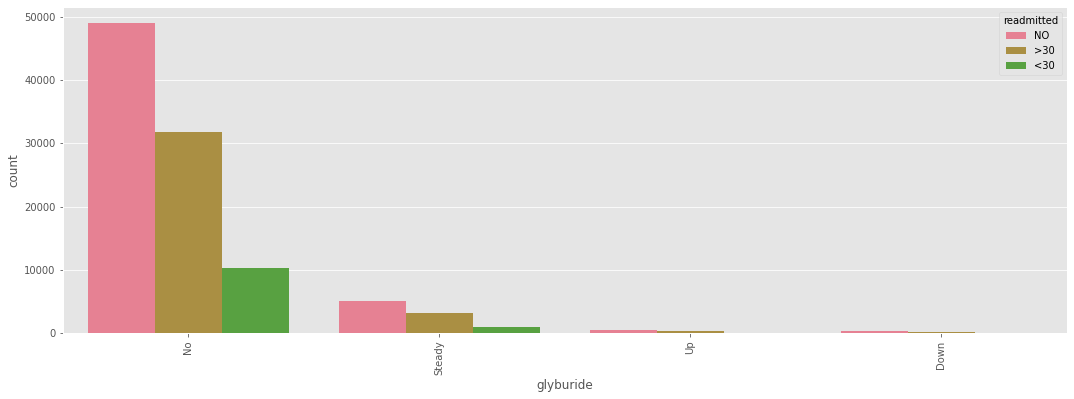

In [87]:
sns.countplot(x = 'glyburide', 
              order = df_raw['glyburide'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [88]:
columnas_cat.append('glyburide')

## Tolbutamide 

In [89]:
display(df_raw['tolbutamide'].value_counts(normalize=True))

No        0.999774
Steady    0.000226
Name: tolbutamide, dtype: float64

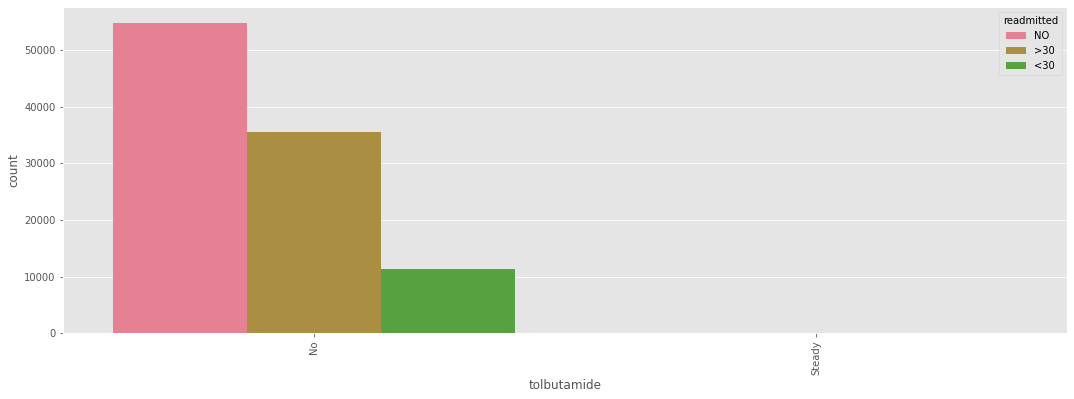

In [90]:
sns.countplot(x = 'tolbutamide', 
              order = df_raw['tolbutamide'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [91]:
columnas_dropear.append('tolbutamide')

## Pioglitazone

In [92]:
display(df_raw['pioglitazone'].value_counts(normalize=True))

No        0.927992
Steady    0.068549
Up        0.002299
Down      0.001160
Name: pioglitazone, dtype: float64

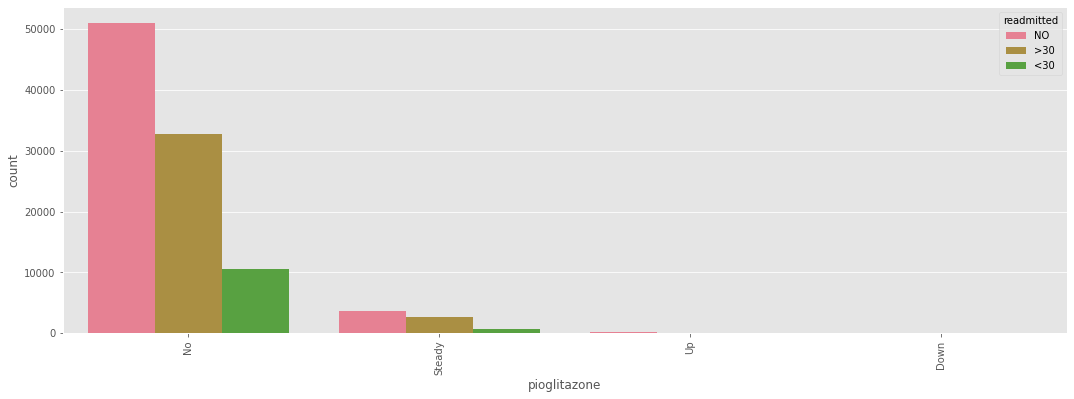

In [93]:
sns.countplot(x = 'pioglitazone', 
              order = df_raw['pioglitazone'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [94]:
columnas_dropear.append('pioglitazone')

## Rosiglitazone

In [95]:
display(df_raw['rosiglitazone'].value_counts(normalize=True))

No        0.937455
Steady    0.059941
Up        0.001749
Down      0.000855
Name: rosiglitazone, dtype: float64

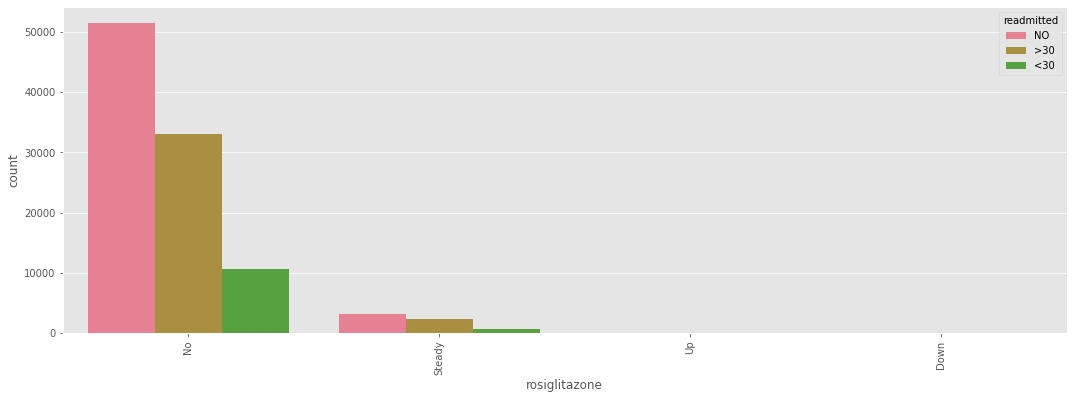

In [96]:
sns.countplot(x = 'rosiglitazone', 
              order = df_raw['rosiglitazone'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [97]:
columnas_dropear.append('rosiglitazone')

## Acarbose

In [98]:
display(df_raw['acarbose'].value_counts(normalize=True))

No        0.996973
Steady    0.002899
Up        0.000098
Down      0.000029
Name: acarbose, dtype: float64

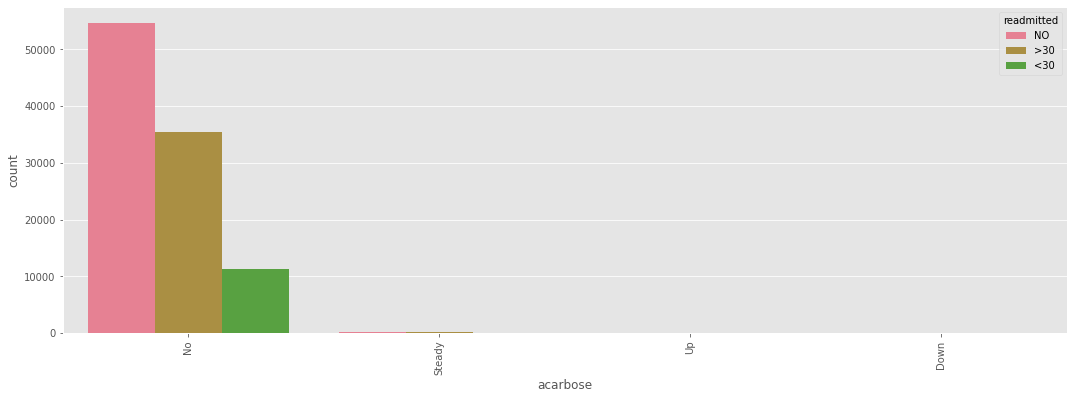

In [99]:
sns.countplot(x = 'acarbose', 
              order = df_raw['acarbose'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [100]:
columnas_dropear.append('acarbose')

## Miglitol

In [101]:
display(df_raw['miglitol'].value_counts(normalize=True))

No        0.999627
Steady    0.000305
Down      0.000049
Up        0.000020
Name: miglitol, dtype: float64

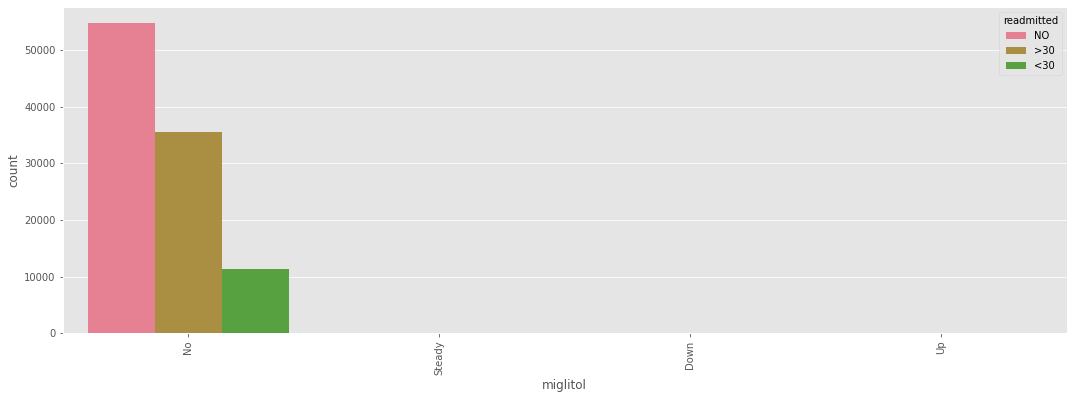

In [102]:
sns.countplot(x = 'miglitol', 
              order = df_raw['miglitol'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [103]:
columnas_dropear.append('miglitol')

## Troglitazone

In [104]:
display(df_raw['troglitazone'].value_counts(normalize=True))

No        0.999971
Steady    0.000029
Name: troglitazone, dtype: float64

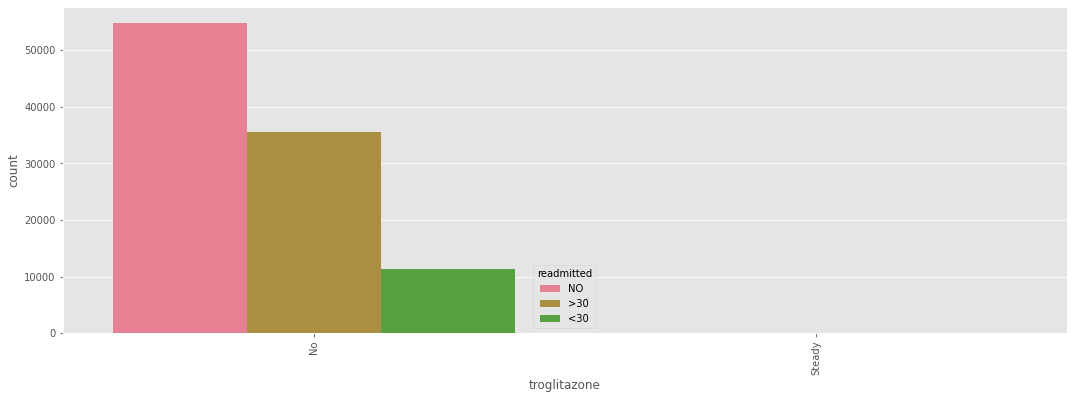

In [105]:
sns.countplot(x = 'troglitazone', 
              order = df_raw['troglitazone'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [106]:
columnas_dropear.append('troglitazone')

## Tolazamide

In [107]:
display(df_raw['tolazamide'].value_counts(normalize=True))

No        0.999617
Steady    0.000373
Up        0.000010
Name: tolazamide, dtype: float64

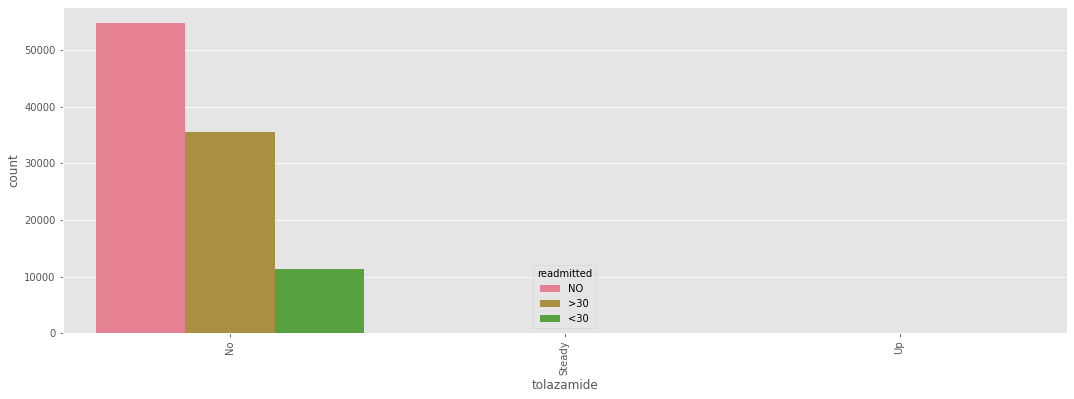

In [108]:
sns.countplot(x = 'tolazamide', 
              order = df_raw['tolazamide'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [109]:
columnas_dropear.append('tolazamide')

## Examide

In [110]:
display(df_raw['examide'].value_counts(normalize=True))

No    1.0
Name: examide, dtype: float64

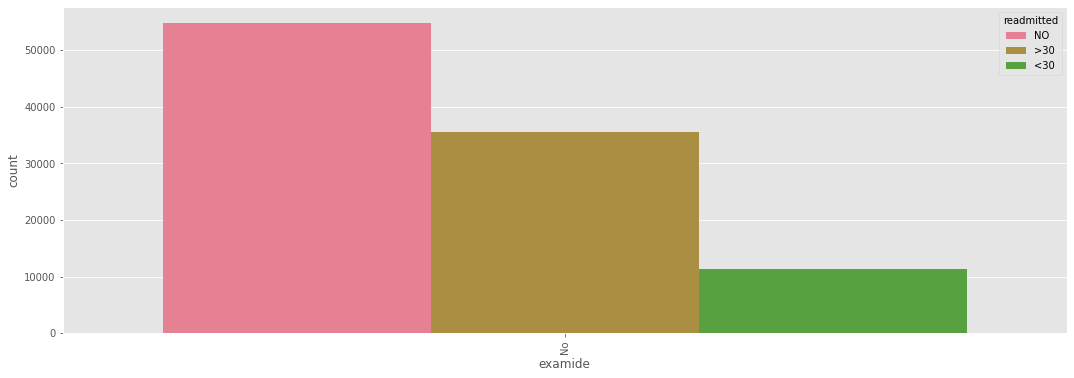

In [111]:
sns.countplot(x = 'examide', 
              order = df_raw['examide'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [112]:
columnas_dropear.append('examide')

## Citoglipton

In [113]:
display(df_raw['citoglipton'].value_counts(normalize=True))

No    1.0
Name: citoglipton, dtype: float64

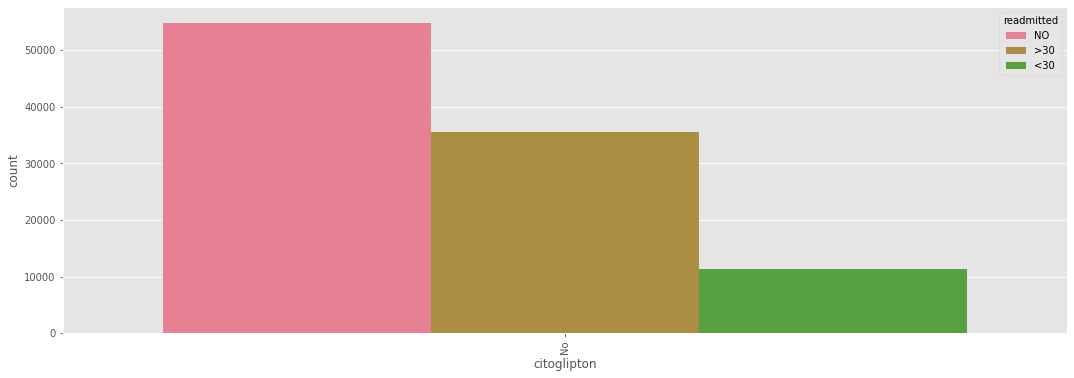

In [114]:
sns.countplot(x = 'citoglipton', 
              order = df_raw['citoglipton'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [115]:
columnas_dropear.append('citoglipton')

## Insulin

In [116]:
display(df_raw['insulin'].value_counts(normalize=True))

No        0.465607
Steady    0.303137
Down      0.120060
Up        0.111196
Name: insulin, dtype: float64

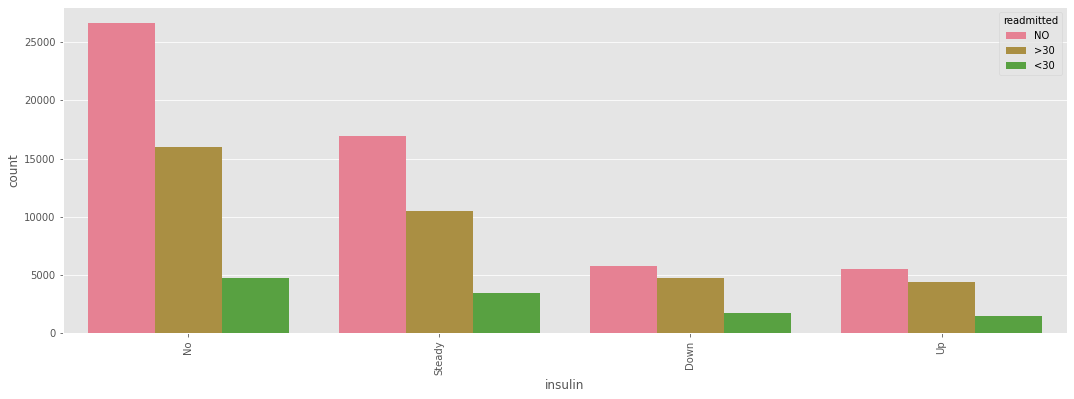

In [117]:
sns.countplot(x = 'insulin', 
              order = df_raw['insulin'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [118]:
columnas_cat.append('insulin')

## Glyburide-metformin

In [119]:
display(df_raw['glyburide-metformin'].value_counts(normalize=True))

No        0.993063
Steady    0.006800
Up        0.000079
Down      0.000059
Name: glyburide-metformin, dtype: float64

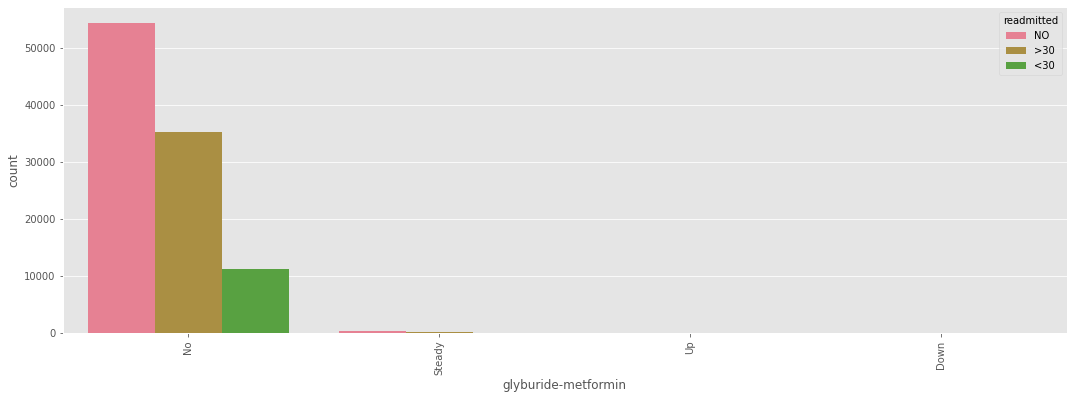

In [120]:
sns.countplot(x = 'glyburide-metformin', 
              order = df_raw['glyburide-metformin'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [121]:
columnas_dropear.append('glyburide-metformin')

## Glipizide-metformin

In [122]:
display(df_raw['glipizide-metformin'].value_counts(normalize=True))

No        0.999872
Steady    0.000128
Name: glipizide-metformin, dtype: float64

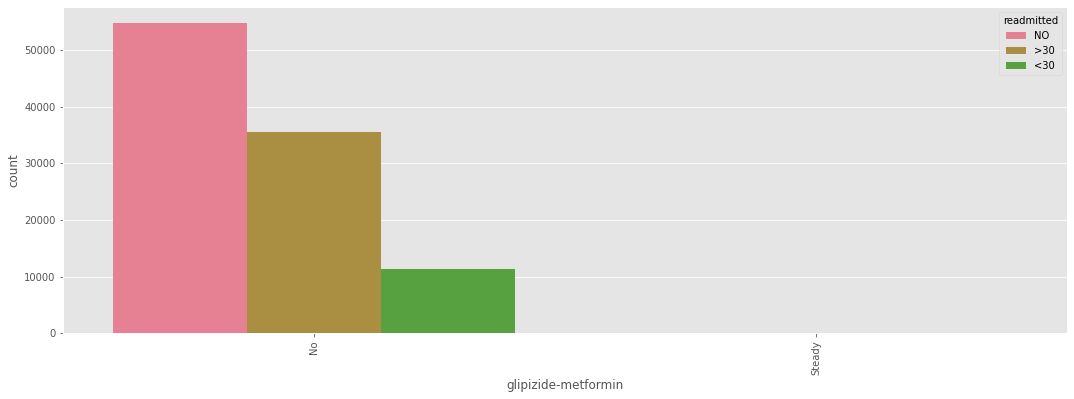

In [123]:
sns.countplot(x = 'glipizide-metformin', 
              order = df_raw['glipizide-metformin'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [124]:
columnas_dropear.append('glipizide-metformin')

## Glimepiride-pioglitazone

In [125]:
display(df_raw['glimepiride-pioglitazone'].value_counts(normalize=True))

No        0.99999
Steady    0.00001
Name: glimepiride-pioglitazone, dtype: float64

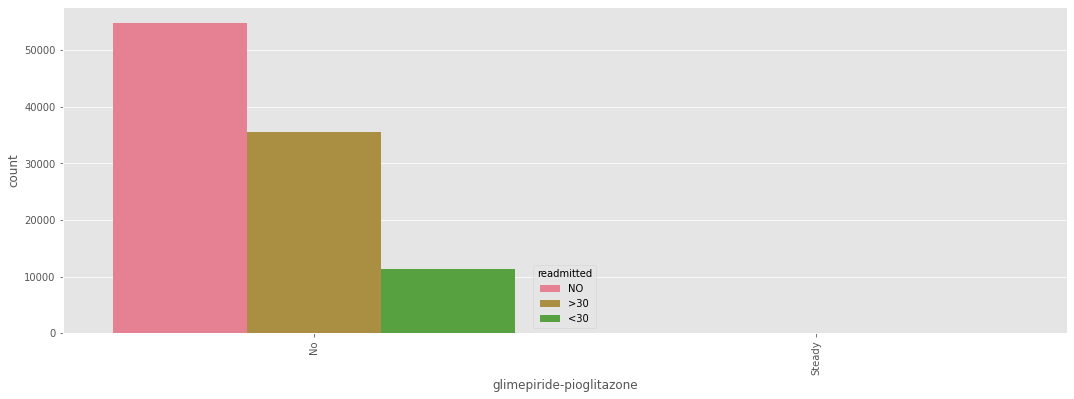

In [126]:
sns.countplot(x = 'glimepiride-pioglitazone', 
              order = df_raw['glimepiride-pioglitazone'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [127]:
columnas_dropear.append('glimepiride-pioglitazone')

## Metformin-rosiglitazone

In [128]:
display(df_raw['metformin-rosiglitazone'].value_counts(normalize=True))

No        0.99998
Steady    0.00002
Name: metformin-rosiglitazone, dtype: float64

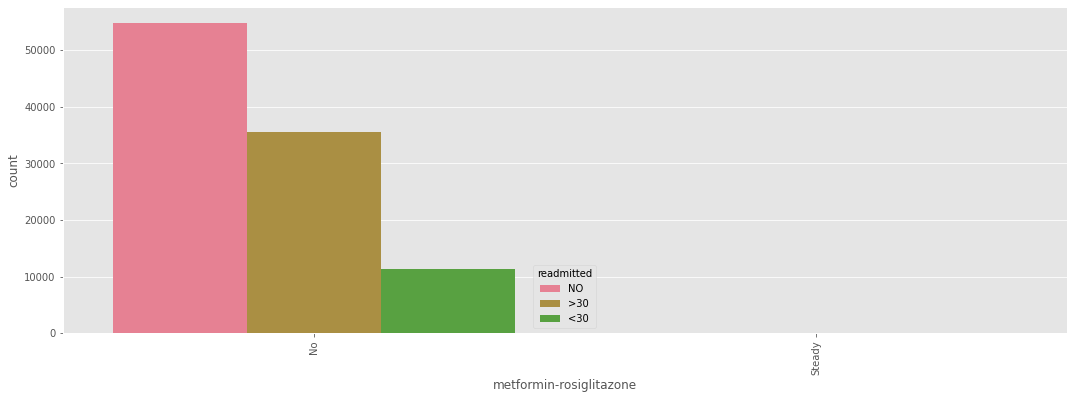

In [129]:
sns.countplot(x = 'metformin-rosiglitazone', 
              order = df_raw['metformin-rosiglitazone'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [130]:
columnas_dropear.append('metformin-rosiglitazone')

## Metformin-pioglitazone

In [131]:
display(df_raw['metformin-pioglitazone'].value_counts(normalize=True))

No        0.99999
Steady    0.00001
Name: metformin-pioglitazone, dtype: float64

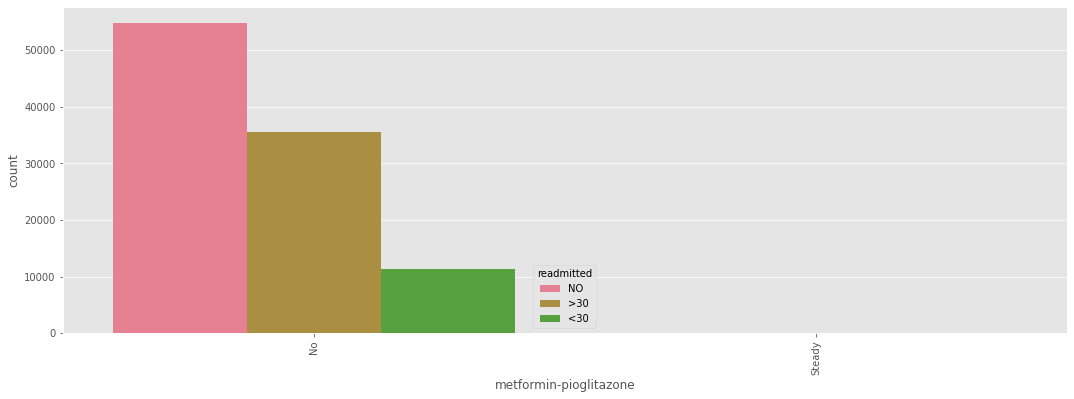

In [132]:
sns.countplot(x = 'metformin-pioglitazone', 
              order = df_raw['metformin-pioglitazone'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [133]:
columnas_dropear.append('metformin-pioglitazone')

## Change

In [134]:
display(df_raw['change'].value_counts(normalize=True))

No    0.538048
Ch    0.461952
Name: change, dtype: float64

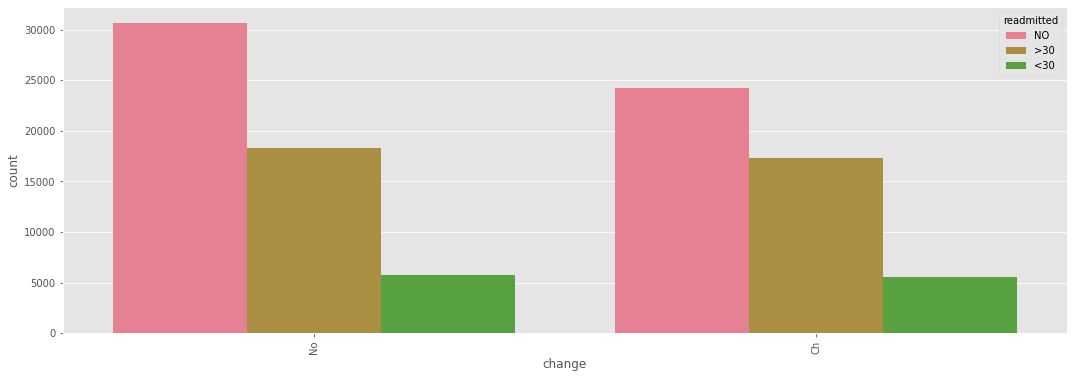

In [135]:
sns.countplot(x = 'change', 
              order = df_raw['change'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [136]:
columnas_cat.append('change')

## DiabetesMed 

In [137]:
display(df_raw['diabetesMed'].value_counts(normalize=True))

Yes    0.770031
No     0.229969
Name: diabetesMed, dtype: float64

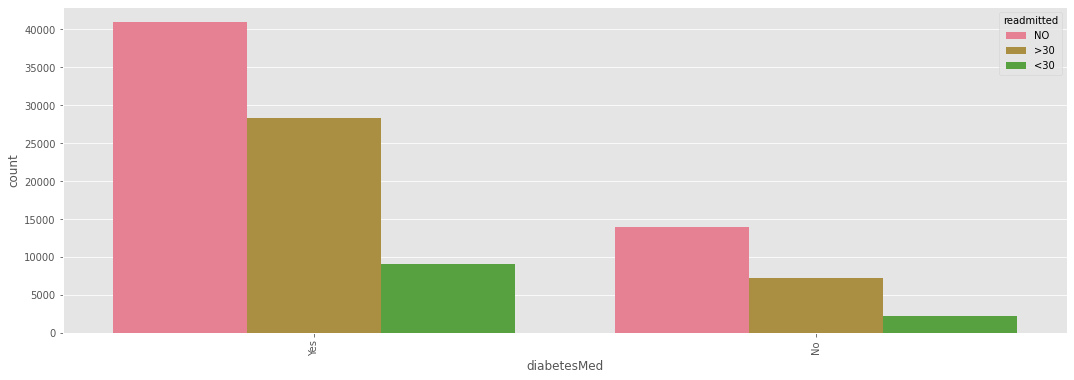

In [138]:
sns.countplot(x = 'diabetesMed', 
              order = df_raw['diabetesMed'].value_counts().index,
              data = df_raw,
              hue='readmitted')
plt.xticks(rotation = 90);

In [139]:
columnas_cat.append('diabetesMed')

## Readmitted (target)

In [140]:
display(df_raw['readmitted'].value_counts(normalize=True))

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

In [180]:
columnas_cat.append('readmitted')

# Limpieza de datos

In [181]:
columnas_cat

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'num_procedures',
 'number_inpatient',
 'A1Cresult',
 'metformin',
 'glyburide',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [182]:
columnas_num

['num_medications', 'number_diagnoses']

In [183]:
df_sin_limpiar = df_raw[columnas_cat + columnas_num]

In [184]:
df_sin_limpiar.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
num_procedures              0
number_inpatient            0
A1Cresult                   0
metformin                   0
glyburide                   0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
num_medications             0
number_diagnoses            0
dtype: int64

In [176]:
for col in columnas_cat:
    df_sin_limpiar[col] = df_sin_limpiar[col].astype('category')

In [177]:
df_sin_limpiar.dtypes

race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital            category
payer_code                  category
num_procedures              category
number_inpatient            category
A1Cresult                   category
metformin                   category
glyburide                   category
insulin                     category
change                      category
diabetesMed                 category
num_medications                int64
number_diagnoses               int64
dtype: object

## Race

In [145]:
df_sin_limpiar['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [146]:
df_sin_limpiar.loc[df_sin_limpiar['race'] != 'Caucasian', 'race'] = 'Not Caucasian'

In [147]:
df_sin_limpiar['race'].value_counts()

Caucasian        76099
Not Caucasian    25667
Name: race, dtype: int64

## Gender

In [148]:
df_sin_limpiar['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [149]:
df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['gender'] == 'Unknown/Invalid'].index, inplace=True)

In [150]:
df_sin_limpiar['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

## Age

In [152]:
df_sin_limpiar['age'].value_counts()

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [165]:
df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['age'] == '[10-20)'].index, inplace=True)
df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['age'] == '[0-10)'].index, inplace=True)

In [154]:
df_sin_limpiar['age'].value_counts()

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
Name: age, dtype: int64

## Admission type id

In [173]:
df_sin_limpiar['admission_type_id'].value_counts()

1    53441
3    18763
2    18344
6     5240
5     4775
8      319
7       20
4        9
Name: admission_type_id, dtype: int64

In [174]:
df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['admission_type_id'] == 8].index, inplace=True)
df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['admission_type_id'] == 7].index, inplace=True)
df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['admission_type_id'] == 4].index, inplace=True)

In [175]:
df_sin_limpiar['admission_type_id'].value_counts()

1    53441
3    18763
2    18344
6     5240
5     4775
Name: admission_type_id, dtype: int64

## Discharge disposition id

In [189]:
df_sin_limpiar['discharge_disposition_id'].value_counts(normalize=True)

Int64Index([ 1,  3,  6, 18,  2, 22, 11,  5, 25,  4,  7, 23, 13, 14, 28,  8, 15,
            24,  9, 17, 16, 19, 10, 27, 12, 20],
           dtype='int64')

In [192]:
nums = df_sin_limpiar['discharge_disposition_id'].value_counts(normalize=True).index
not_drop = [1, 3, 6]

for v in nums:
    if v not in not_drop:
        df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['discharge_disposition_id'] == v].index, inplace=True)

In [193]:
df_sin_limpiar['discharge_disposition_id'].value_counts(normalize=True)

1    0.691629
3    0.160225
6    0.148146
Name: discharge_disposition_id, dtype: float64

## Admission source id

In [194]:
df_sin_limpiar['admission_source_id'].value_counts(normalize=True)

7     0.563911
1     0.298071
17    0.066093
4     0.027684
6     0.022138
2     0.010047
5     0.007487
20    0.001791
9     0.001320
3     0.001045
22    0.000126
8     0.000115
10    0.000092
11    0.000023
14    0.000023
25    0.000023
13    0.000011
Name: admission_source_id, dtype: float64

In [195]:
nums = df_sin_limpiar['admission_source_id'].value_counts(normalize=True).index
not_drop = [7, 1, 17]

for v in nums:
    if v not in not_drop:
        df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['admission_source_id'] == v].index, inplace=True)

In [196]:
df_sin_limpiar['admission_source_id'].value_counts(normalize=True)

7     0.607614
1     0.321171
17    0.071215
Name: admission_source_id, dtype: float64

## Time in hospital

In [201]:
df_sin_limpiar['time_in_hospital'].value_counts(normalize=True)

3     0.181018
2     0.177517
1     0.144112
4     0.139015
5     0.096937
6     0.072044
7     0.055576
8     0.040519
9     0.026761
10    0.020229
11    0.015651
12    0.012261
13    0.010083
14    0.008277
Name: time_in_hospital, dtype: float64

In [202]:
nums = df_sin_limpiar['time_in_hospital'].value_counts(normalize=True).index
not_drop = [3, 2, 1, 4, 5, 6, 7, 8]

for v in nums:
    if v not in not_drop:
        df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['time_in_hospital'] == v].index, inplace=True)

In [203]:
df_sin_limpiar['time_in_hospital'].value_counts(normalize=True)

3    0.199637
2    0.195776
1    0.158935
4    0.153313
5    0.106907
6    0.079454
7    0.061292
8    0.044687
Name: time_in_hospital, dtype: float64

## Payer code

In [211]:
df_sin_limpiar['payer_code'].value_counts(normalize=True)

NN    0.356225
MC    0.330982
HM    0.067733
SP    0.055739
BC    0.053024
MD    0.035654
CP    0.028245
UN    0.021109
CM    0.021081
OG    0.011489
PO    0.006863
DM    0.006113
CH    0.001774
WC    0.001596
OT    0.001092
MP    0.000641
SI    0.000641
Name: payer_code, dtype: float64

In [210]:
df_sin_limpiar['payer_code'] = df_sin_limpiar['payer_code'].str.replace('?', 'NN', regex=False)

In [213]:
codes = df_sin_limpiar['payer_code'].value_counts(normalize=True).index
not_drop = ['NN', 'MC', 'HM', 'SP', 'BC', 'MD', 'CP', 'UN', 'CM']

for v in codes:
    if v not in not_drop:
        df_sin_limpiar.drop(df_sin_limpiar[df_sin_limpiar['payer_code'] == v].index, inplace=True)

In [214]:
df_sin_limpiar['payer_code'].value_counts(normalize=True)

NN    0.367321
MC    0.341292
HM    0.069843
SP    0.057475
BC    0.054675
MD    0.036764
CP    0.029125
UN    0.021766
CM    0.021738
Name: payer_code, dtype: float64

## N° procedures

In [217]:
df_sin_limpiar['num_procedures'].value_counts(normalize=True)

0    0.485297
1    0.209233
2    0.118792
3    0.084743
6    0.041182
4    0.035470
5    0.025284
Name: num_procedures, dtype: float64

## Number inpatient